### import and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity

In [2]:
raw_df = pd.read_csv("homework_sampledata1.txt").drop("2008", axis='columns')
raw_df.replace(-99, np.nan, inplace=True)
raw_df.tail()


,1,2,3,4,5,6,7,8,9,10,11,12
26,13.5,13.0,19.8,21.9,26.9,NaN,25.8,27.3,24.1,24.0,16.3,17.9
27,13.3,12.6,20.9,21.7,28.2,25.9,26.4,26.1,25.0,24.5,15.0,19.4
28,12.0,10.4,22.2,23.5,27.8,26.5,26.0,27.6,22.3,24.4,13.2,18.5
29,9.6,NaN,21.5,24.0,23.6,27.1,26.0,28.0,22.0,24.7,13.4,14.7
30,8.6,NaN,19.3,NaN,24.4,NaN,27.1,25.9,NaN,25.5,NaN,14.6


### Exercise 1

In [3]:
np_df = raw_df.to_numpy()

mean_ = np.nanmean(np_df)
std_ = np.nanstd(np_df)
mean_ , std_

(21.24321329639889, 5.2995128278099655)

Text(0.5, 1.0, 'Histogram of a dataset with: $\\mu=21.2$, $\\sigma=5.3$')

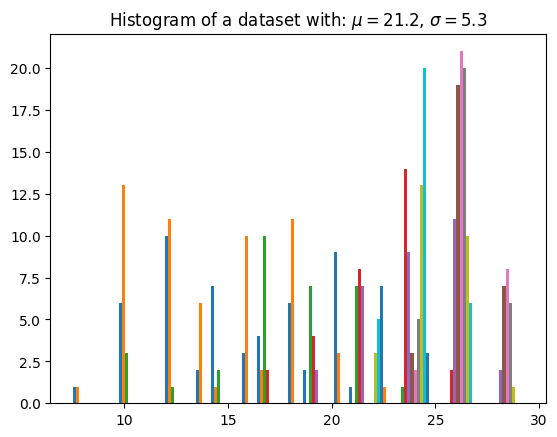

In [4]:
plt.figure()
# the histogram of the data
plt.hist(np_df, histtype='bar')
# plt.ylabel('Probability density')
plt.title(r'Histogram of a dataset with: $\mu=21.2$, $\sigma=5.3$')

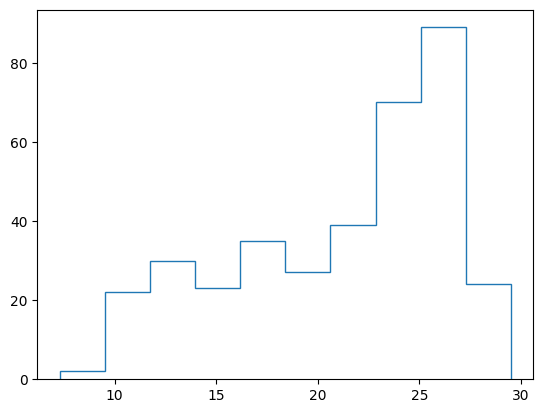

In [5]:
counts, bins = np.histogram(np_df[~np.isnan(np_df)])
plt.stairs(counts, bins)

Text(0, 0.5, 'Frequency')

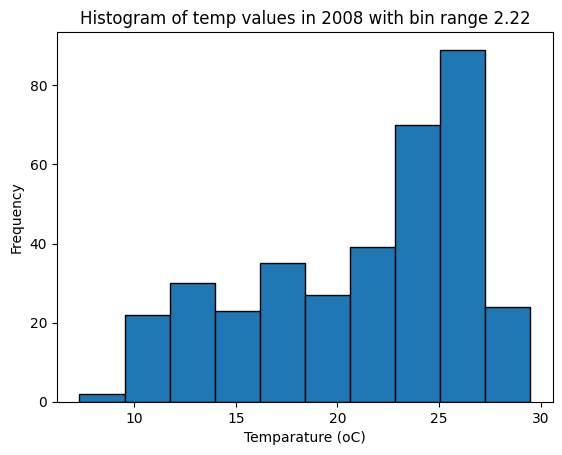

In [6]:
b = []
for i in range(len(bins)-1):
    b.append((bins[i] + bins[i+1])/2)
bar_width = bins[1]-bins[0]

plt.bar(b,counts, width=bar_width ,edgecolor='0')
plt.title("Histogram of temp values in 2008 with bin range 2.22")
plt.xlabel("Temparature (oC)")
plt.ylabel("Frequency")

### Exercise 2

In [7]:
mean_month = raw_df.mean()
std_month = raw_df.std()

mean_month, std_month

(1     14.274194
 2     12.057143
 3     18.080645
 4     22.553333
 5     24.190323
 6     26.465517
 7     26.658065
 8     26.280645
 9     24.848148
 10    24.064516
 11    19.273333
 12    16.064516
 dtype: float64,
 1     3.163960
 2     1.988379
 3     3.249043
 4     2.189746
 5     2.203384
 6     1.046517
 7     0.976652
 8     1.248845
 9     1.312769
 10    1.111620
 11    3.005505
 12    2.230179
 dtype: float64)

Text(0, 0.5, 'Temperature (oC)')

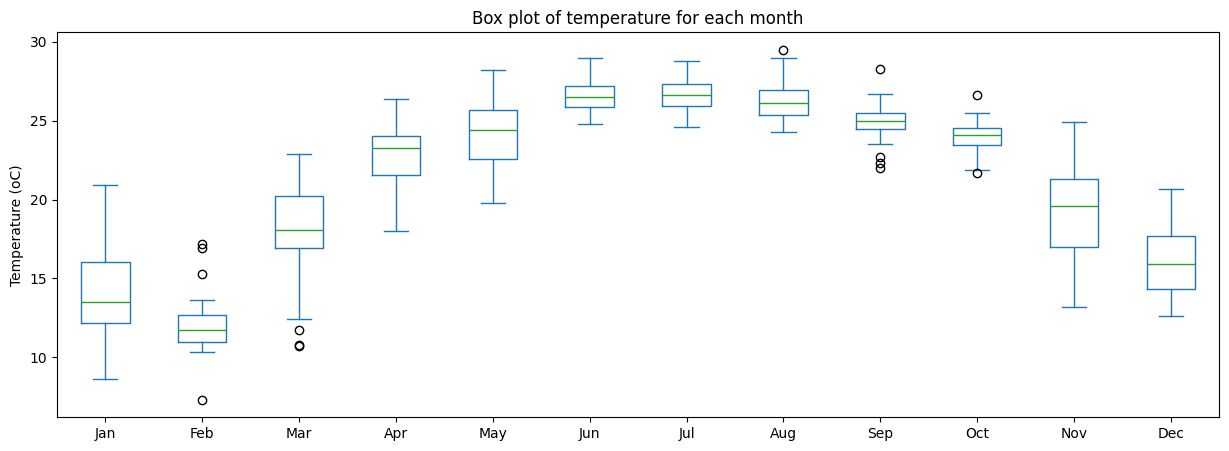

In [8]:
# plt.figure(figsize=(15,5))
raw_df.plot(kind='box', figsize=(15,5) )
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.ylabel("Temperature (oC)")

### Exercise 3

Text(0, 0.5, 'Temperature (oC)')

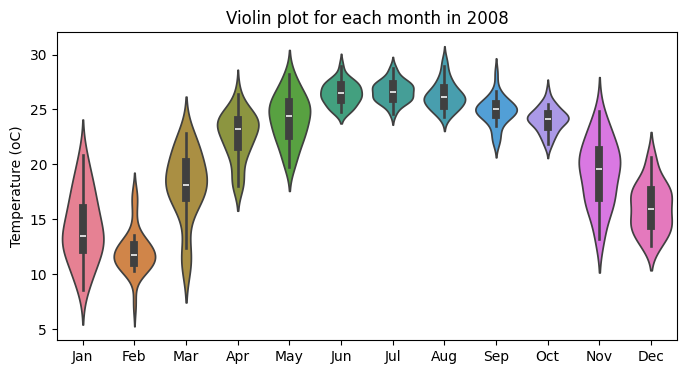

In [16]:
plt.figure(figsize=(8,4))
sns.violinplot(data=np_df)
plt.title("Violin plot for each month in 2008")
plt.xticks(list(range(0,12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylabel("Temperature (oC)")

### Exercise 4

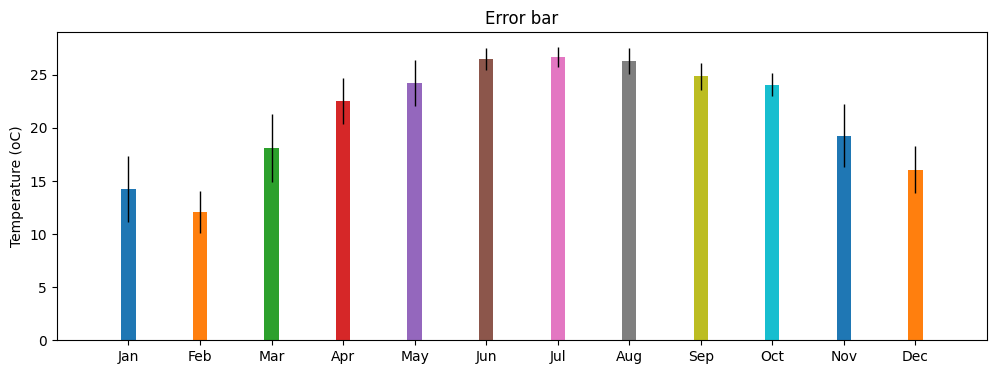

In [37]:
plt.figure(figsize=(12,4))
plt.title('Error bar')
for i, data in enumerate(np_df.T):
    data = data[~np.isnan(data)]
    #We need a bar first
    plt.bar(i+1, np.mean(data), width=0.2)

    #Then, if we consider the error bar equal to 1 standard deviation
    plt.vlines(i+1, np.mean(data) - np.std(data),np.mean(data) + np.std(data) , color='k', linestyle='-', lw=1)

plt.ylim(10,30)
plt.xlim(0,13)
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylabel("Temperature (oC)")
plt.show()

### Exercise 5

In [ ]:
#math
math_df = []
with open("HW2_math_score.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        math_df.append([float(x) for x in line.split(" ")])

In [65]:
#literature
lite_df = []
with open("HW2_literature_score.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        lite_df.append([float(x) for x in line.split(" ")])

In [47]:
def total_score(mid, fin):
    return 0.4*mid + 0.6*fin

In [67]:
math_score = []
lite_score = []
for row in range(len(math_df)):
    lite_score.append(total_score(lite_df[row][0],lite_df[row][1]))
    math_score.append(total_score(math_df[row][0],math_df[row][1]))


[0.4452113991970186,
 0.36880097006742574,
 0.1516009717380979,
 0.4939626247329043,
 0.35704789551545835,
 0.3507415937512838,
 0.45282301524305224,
 0.38413934560068563,
 0.15228845865107443,
 0.06491036550031959,
 0.061768491629777204,
 0.502357990108471,
 0.23187982816978278,
 0.1708851939195784,
 0.6851558326849762,
 0.34946312076785424,
 0.3601490800078334,
 0.5608265327858108,
 0.21506263459057678,
 0.11125015848076496,
 0.06596647652636749,
 0.05843613216906151,
 0.5217964475536234,
 0.4079937042533731,
 0.21542903170769248,
 0.6420379920889543,
 0.6496774561123841,
 0.6202603179522762,
 0.6210035441433689,
 0.5053331377700216,
 0.10669150929938684,
 0.06455523414051763,
 0.06066480504622253,
 0.4301028824801578,
 0.5101739012418064,
 0.06300306057643526,
 0.3873722647902105,
 0.49345580702477265,
 0.670186833265411,
 0.36967164576805067,
 0.548211848727266,
 0.04490063325579065,
 0.06151947681354306,
 0.058135904420555176,
 0.4426755888751083]